<a href="https://colab.research.google.com/github/DIPANJAN001/Andrew-Ng-Machine-Learning-Notes/blob/master/PVx1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
df=pd.read_excel("/content/pv_04.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [29]:
rfc = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(weather_input), np.array(solpow)) 

KeyboardInterrupt: ignored

In [ ]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [ ]:
X_important_train = boruta_selector.transform(np.array(weather_input))
num_steps = 3
# training set
(x_transformed_train,
 y_transformed_train) = lstm_data_transform(X_important_train,solpow , num_steps=num_steps)
assert x_transformed_train.shape[0] == y_transformed_train.shape[0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_transformed_train,y_transformed_train,test_size=0.4, random_state=42,shuffle=False)
#X_train_,X_val,y_train_,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=42,shuffle=False)

In [ ]:
inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))

In [ ]:
from keras.layers import Bidirectional
from keras import layers

In [ ]:
def get_model1(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(inputs1)#32
    fe1_1 = Dropout(0.5)(fe1_0)
    fe1_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe1_1)#16
    fe1_3= Dropout(0.5)(fe1_2)
    fe1_4=Bidirectional(LSTM(8, activation='relu'))(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model2(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=Bidirectional(LSTM(8, activation='relu'))(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model3(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,8,8
    fe3_1 = Dropout(0.5)(fe3_0)
    fe3_2 = Bidirectional(LSTM(8, activation='relu',return_sequences = True))(fe3_1)
    fe3_3= Dropout(0.5)(fe3_2)
    fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model1() 
model2 = get_model2() 
model3 = get_model3()
y1 = model1(inputs1) 
y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1, y2, y3]) 
ensemble_model = Model(inputs=inputs1, outputs=outputs)
ensemble_model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history=ensemble_model.fit(X_train, y_train, epochs = 100,validation_split=0.25,batch_size = 32)

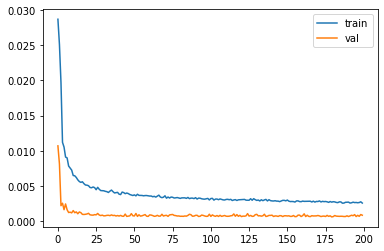

In [43]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [44]:
y_en_=ensemble_model.predict(X_test)
plt.scatter(y_en_,y_test)
plt.show()

ValueError: ignored

In [46]:
df_ = pd.DataFrame()
df_['time']=[i for i in range(len(y_en_))]
df_['Actual']=y_test
df_['Predicted']=y_en_

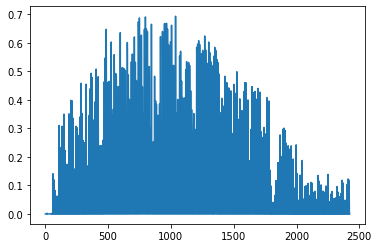

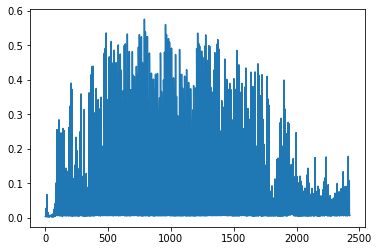

In [52]:
import matplotlib.pyplot as plt
plt.plot(df_['time'],df_['Actual'])
plt.show()
plt.plot(df_['time'],df_['Predicted'])
plt.show()

In [ ]:
def get_model1(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = LSTM(32, activation='relu',return_sequences = True)(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = LSTM(16, activation='relu',return_sequences = True)(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=LSTM(8, activation='relu')(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model2(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = LSTM(16, activation='relu',return_sequences = True)(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = LSTM(16, activation='relu',return_sequences = True)(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=LSTM(8, activation='relu')(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model3(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = LSTM(16, activation='relu',return_sequences = True)(inputs1)#16,8,8
    fe3_1 = Dropout(0.5)(fe3_0)
    fe3_2 = LSTM(8, activation='relu',return_sequences = True)(fe3_1)
    fe3_3= Dropout(0.5)(fe3_2)
    fe3_4=LSTM(8, activation='relu')(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model1() 
#model2 = get_model2() 
model3 = get_model3()
y1 = model1(inputs1) 
#y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1,y3]) 
ensemble_model = Model(inputs=inputs1, outputs=outputs)
ensemble_model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history=ensemble_model.fit(X_train, y_train, epochs = 200,validation_split=0.25,batch_size = 64)

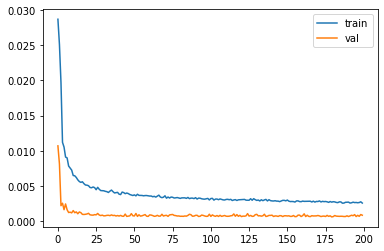

In [48]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [49]:
y_en=ensemble_model.predict(X_test)
plt.scatter(y_en,y_test)
plt.show()

ValueError: ignored

In [ ]:
df_ = pd.DataFrame()

In [ ]:
df_['time']=[i for i in range(len(y_en))]
df_['Actual']=y_test
df_['Predicted']=y_en


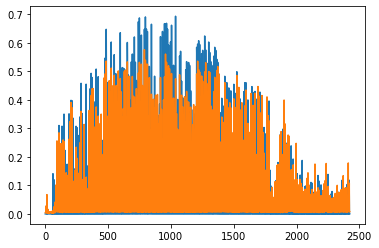

In [50]:
import matplotlib.pyplot as plt
plt.plot(df_['time'],df_['Actual'])
plt.plot(df_['time'],df_['Predicted'])
plt.show()

In [31]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input

In [32]:
n_inputs=weather_input.shape[1]

In [33]:
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
#n_bottleneck = round(float(n_inputs) / 2.0)
n_bottleneck = 20
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [34]:
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [35]:
 model.fit(weather_input,weather_input, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
190/190 - 6s - loss: 0.0929 - 6s/epoch - 34ms/step
Epoch 2/100
190/190 - 1s - loss: 0.0199 - 1s/epoch - 8ms/step
Epoch 3/100
190/190 - 1s - loss: 0.0158 - 1s/epoch - 6ms/step
Epoch 4/100
190/190 - 1s - loss: 0.0139 - 1s/epoch - 6ms/step
Epoch 5/100
190/190 - 1s - loss: 0.0129 - 1s/epoch - 7ms/step
Epoch 6/100
190/190 - 1s - loss: 0.0116 - 1s/epoch - 7ms/step
Epoch 7/100
190/190 - 2s - loss: 0.0110 - 2s/epoch - 8ms/step
Epoch 8/100
190/190 - 1s - loss: 0.0102 - 1s/epoch - 7ms/step
Epoch 9/100
190/190 - 1s - loss: 0.0100 - 1s/epoch - 7ms/step
Epoch 10/100
190/190 - 1s - loss: 0.0097 - 1s/epoch - 7ms/step
Epoch 11/100
190/190 - 1s - loss: 0.0086 - 1s/epoch - 7ms/step
Epoch 12/100
190/190 - 1s - loss: 0.0083 - 1s/epoch - 7ms/step
Epoch 13/100
190/190 - 1s - loss: 0.0083 - 1s/epoch - 6ms/step
Epoch 14/100
190/190 - 1s - loss: 0.0077 - 1s/epoch - 6ms/step
Epoch 15/100
190/190 - 1s - loss: 0.0077 - 1s/epoch - 7ms/step
Epoch 16/100
190/190 - 1s - loss: 0.0075 - 1s/epoch - 6ms/step


In [36]:
# define an encoder model (without the decoder)
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder.h5')

In [37]:
solpow=solpow.to_numpy().reshape(-1,1)
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

190/190 [==============================] - 0s 2ms/step


In [38]:
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

190/190 [==============================] - 0s 2ms/step


In [39]:
num_steps = 3
# training set
(x_transformed1,
 y_transformed1) = lstm_data_transform(X_train_encode,solpow , num_steps=num_steps)
assert x_transformed1.shape[0] == y_transformed1.shape[0]

In [40]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_transformed1, y_transformed1, test_size=0.4, random_state=42,shuffle=False)

In [41]:
inputs1=Input(shape=(X_train1.shape[1],X_train1.shape[2]))

In [51]:
def get_model1(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=Bidirectional(LSTM(8, activation='relu'))(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model2(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=Bidirectional(LSTM(8, activation='relu'))(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model3(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,8,8
    fe3_1 = Dropout(0.5)(fe3_0)
    fe3_2 = Bidirectional(LSTM(8, activation='relu',return_sequences = True))(fe3_1)
    fe3_3= Dropout(0.5)(fe3_2)
    fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model1() 
model2 = get_model2() 
model3 = get_model3()
y1 = model1(inputs1) 
y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1, y2, y3]) 
ensemble_model = Model(inputs=inputs1, outputs=outputs)
ensemble_model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history=ensemble_model.fit(X_train1, y_train1, epochs = 100,validation_split=0.25,batch_size = 32)

Epoch 1/100
86/86 [==============================] - 36s 66ms/step - loss: 0.0160 - root_mean_squared_error: 0.1266 - val_loss: 9.2859e-04 - val_root_mean_squared_error: 0.0305
Epoch 2/100
86/86 [==============================] - 3s 30ms/step - loss: 0.0050 - root_mean_squared_error: 0.0706 - val_loss: 9.4026e-04 - val_root_mean_squared_error: 0.0307
Epoch 3/100
86/86 [==============================] - 3s 31ms/step - loss: 0.0044 - root_mean_squared_error: 0.0664 - val_loss: 7.5783e-04 - val_root_mean_squared_error: 0.0275
Epoch 4/100
86/86 [==============================] - 3s 31ms/step - loss: 0.0038 - root_mean_squared_error: 0.0615 - val_loss: 7.3941e-04 - val_root_mean_squared_error: 0.0272
Epoch 5/100
86/86 [==============================] - 3s 30ms/step - loss: 0.0035 - root_mean_squared_error: 0.0588 - val_loss: 7.1535e-04 - val_root_mean_squared_error: 0.0267
Epoch 6/100
86/86 [==============================] - 3s 31ms/step - loss: 0.0031 - root_mean_squared_error: 0.0558 - va

In [67]:
def get_model1(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = LSTM(32, activation='relu',return_sequences = True)(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = LSTM(16, activation='relu',return_sequences = True)(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=LSTM(8, activation='relu')(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model2(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = LSTM(16, activation='relu',return_sequences = True)(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = LSTM(16, activation='relu',return_sequences = True)(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=LSTM(8, activation='relu')(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model3(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = LSTM(16, activation='relu',return_sequences = True)(inputs1)#16,8,8
    fe3_1 = Dropout(0.5)(fe3_0)
    fe3_2 = LSTM(8, activation='relu',return_sequences = True)(fe3_1)
    fe3_3= Dropout(0.5)(fe3_2)
    fe3_4=LSTM(8, activation='relu')(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model1() 
model2 = get_model2() 
model3 = get_model3()
y1 = model1(inputs1) 
y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1, y2, y3]) 
ensemble_model = Model(inputs=inputs1, outputs=outputs)
ensemble_model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history=ensemble_model.fit(X_train1, y_train1, epochs = 100,validation_split=0.25,batch_size = 32)

Epoch 1/100
86/86 [==============================] - 17s 34ms/step - loss: 0.0198 - root_mean_squared_error: 0.1405 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0403
Epoch 2/100
86/86 [==============================] - 1s 16ms/step - loss: 0.0070 - root_mean_squared_error: 0.0839 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0349
Epoch 3/100
86/86 [==============================] - 1s 16ms/step - loss: 0.0057 - root_mean_squared_error: 0.0752 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0327
Epoch 4/100
86/86 [==============================] - 1s 16ms/step - loss: 0.0049 - root_mean_squared_error: 0.0702 - val_loss: 9.0095e-04 - val_root_mean_squared_error: 0.0300
Epoch 5/100
86/86 [==============================] - 1s 16ms/step - loss: 0.0045 - root_mean_squared_error: 0.0673 - val_loss: 8.7054e-04 - val_root_mean_squared_error: 0.0295
Epoch 6/100
86/86 [==============================] - 1s 16ms/step - loss: 0.0044 - root_mean_squared_error: 0.0661 - val_loss: 7.94

76/76 [==============================] - 2s 4ms/step


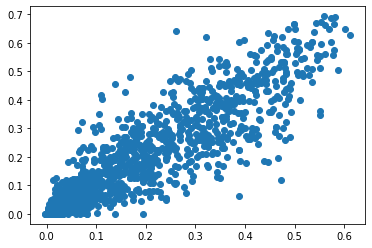

In [68]:
y_en=ensemble_model.predict(X_test1)
plt.scatter(y_en,y_test1)
plt.show()

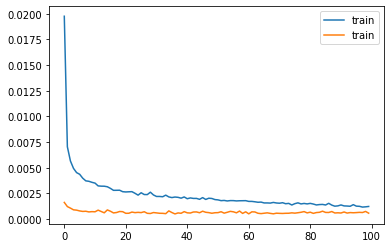

In [69]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='train')
plt.legend()
plt.show()

In [70]:
df_ = pd.DataFrame()
df_['time']=[i for i in range(len(y_en))]
df_['Actual']=y_test
df_['Predicted']=y_en

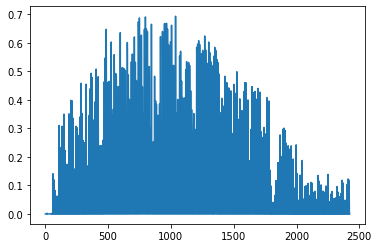

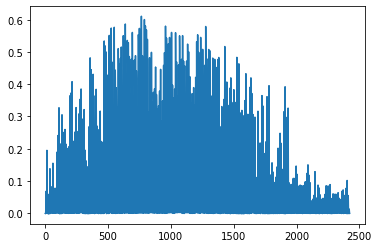

In [72]:
import matplotlib.pyplot as plt
plt.plot(df_['time'],df_['Actual'])
plt.show()
plt.plot(df_['time'],df_['Predicted'])
plt.show()

In [58]:
from sklearn.decomposition import PCA 

In [59]:
pca = PCA(n_components = 20)
pca.fit(weather_input)
data_pca = pca.transform(weather_input)
data_pca = pd.DataFrame(data_pca)

In [60]:
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.315470,-0.635044,-0.035510,-0.344345,-0.682535,-0.062841,-0.330765,0.128793,-0.059887,0.254162,-0.218945,-0.356641,-0.196729,0.051404,0.001762,0.015590,0.063633,-0.013762,-0.115759,-0.051703
1,-1.226025,-0.703730,-0.125116,-0.396101,-0.533396,-0.151571,-0.247686,0.052865,-0.161037,0.067820,-0.162738,-0.093435,-0.240291,0.052829,-0.015187,-0.046888,0.087569,-0.017625,-0.093406,-0.061638
2,-1.136111,-0.748327,-0.008599,-0.507683,-0.343579,-0.242189,-0.181355,0.044011,-0.296859,-0.084403,-0.129139,0.139990,-0.234860,0.048771,-0.006926,-0.062130,0.142369,-0.038902,-0.032132,-0.062534
3,-0.360585,-1.083298,-0.615117,-0.343024,-0.218179,-0.306951,-0.081500,-0.218994,-0.138036,-0.110032,-0.032291,0.129693,0.099010,0.085427,0.008811,0.048572,0.207870,-0.062159,-0.133127,-0.073271
4,-0.019347,-1.223119,-0.748530,-0.283598,0.072800,-0.343089,-0.081277,-0.262731,0.018789,-0.114361,-0.147909,0.111397,-0.009917,0.091238,0.051190,0.166573,0.088766,-0.064640,-0.142395,-0.063859


In [61]:
num_steps = 3
# training set
(x_transformed1,
 y_transformed1) = lstm_data_transform(data_pca,solpow , num_steps=num_steps)
assert x_transformed1.shape[0] == y_transformed1.shape[0]

In [62]:
X_train2, X_test2, y_train2, y_test2= train_test_split(x_transformed1, y_transformed1, test_size=0.4, random_state=42,shuffle=False)

In [63]:
def get_model1(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = LSTM(32, activation='relu',return_sequences = True)(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = LSTM(16, activation='relu',return_sequences = True)(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=LSTM(8, activation='relu')(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model2(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = LSTM(16, activation='relu',return_sequences = True)(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = LSTM(16, activation='relu',return_sequences = True)(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=LSTM(8, activation='relu')(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model3(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = LSTM(16, activation='relu',return_sequences = True)(inputs1)#16,8,8
    fe3_1 = Dropout(0.5)(fe3_0)
    fe3_2 = LSTM(8, activation='relu',return_sequences = True)(fe3_1)
    fe3_3= Dropout(0.5)(fe3_2)
    fe3_4=LSTM(8, activation='relu')(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model1() 
model2 = get_model2() 
model3 = get_model3()
y1 = model1(inputs1) 
y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1, y2, y3]) 
ensemble_model = Model(inputs=inputs1, outputs=outputs)
ensemble_model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history=ensemble_model.fit(X_train2, y_train2, epochs = 200, batch_size = 64)

Epoch 1/200
57/57 [==============================] - 13s 15ms/step - loss: 0.0214 - root_mean_squared_error: 0.1461
Epoch 2/200
57/57 [==============================] - 1s 16ms/step - loss: 0.0098 - root_mean_squared_error: 0.0991
Epoch 3/200
57/57 [==============================] - 1s 16ms/step - loss: 0.0048 - root_mean_squared_error: 0.0695
Epoch 4/200
57/57 [==============================] - 1s 16ms/step - loss: 0.0042 - root_mean_squared_error: 0.0652
Epoch 5/200
57/57 [==============================] - 1s 16ms/step - loss: 0.0039 - root_mean_squared_error: 0.0625
Epoch 6/200
57/57 [==============================] - 1s 16ms/step - loss: 0.0035 - root_mean_squared_error: 0.0596
Epoch 7/200
57/57 [==============================] - 1s 16ms/step - loss: 0.0035 - root_mean_squared_error: 0.0594
Epoch 8/200
57/57 [==============================] - 1s 15ms/step - loss: 0.0036 - root_mean_squared_error: 0.0603
Epoch 9/200
57/57 [==============================] - 1s 15ms/step - loss: 0.003

76/76 [==============================] - 2s 4ms/step


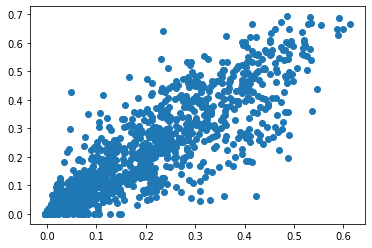

In [64]:
y_en=ensemble_model.predict(X_test2)
plt.scatter(y_en,y_test2)
plt.show()

In [65]:
df_ = pd.DataFrame()
df_['time']=[i for i in range(len(y_en))]
df_['Actual']=y_test2
df_['Predicted']=y_en

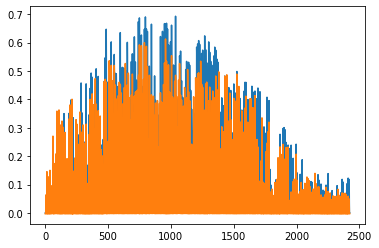

In [66]:
import matplotlib.pyplot as plt
plt.plot(df_['time'],df_['Actual'])
plt.plot(df_['time'],df_['Predicted'])
plt.show()